# Investigation of Brown's Rest-frame Templates
this code is intended to be used to explore brown's rest-frame templates. These templates are intended to be used only to experiment with the process of combining seds and are not intended to be used to represent the final sed data as we need to potentially construct the correct galaxy seds by using correct SFHs,etc. In addition to the templates used correspond to the right galaxy type. This can be found in Brown's 2014 paper. 

Rest frame galaxies used in this code will be plotted on UVJ colour space as an experiment and will then be combined with AGN to form composites which will then again be plotted on UVJ colour space

In [1281]:
# Import all of the relevant libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
from scipy.optimize import minimize


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1282]:
# Begin by reading in the Brown template
brown_folderpath = os.path.join('datasets', 'Templates', 'Brown', '2014','Rest')
print(brown_folderpath)
df_list, objname_list = read_brown_galaxy_templates(brown_folderpath)


datasets\Templates\Brown\2014\Rest
['Arp_118_restframe.dat', 'Arp_256_N_restframe.dat', 'Arp_256_S_restframe.dat', 'CGCG_049-057_restframe.dat', 'CGCG_436-030_restframe.dat', 'CGCG_453-062_restframe.dat', 'Haro_06_restframe.dat', 'IC_0691_restframe.dat', 'IC_0860_restframe.dat', 'IC_0883_restframe.dat', 'IC_4051_restframe.dat', 'IC_4553_restframe.dat', 'IC_5298_restframe.dat', 'III_Zw_035_restframe.dat', 'II_Zw_096_restframe.dat', 'IRAS_08572+3915_restframe.dat', 'IRAS_17208-0014_restframe.dat', 'Mrk_0331_restframe.dat', 'Mrk_0475_restframe.dat', 'Mrk_0930_restframe.dat', 'Mrk_1450_restframe.dat', 'Mrk_1490_restframe.dat', 'Mrk_33_restframe.dat', 'NGC_0337_restframe.dat', 'NGC_0474_restframe.dat', 'NGC_0520_restframe.dat', 'NGC_0584_restframe.dat', 'NGC_0628_restframe.dat', 'NGC_0660_restframe.dat', 'NGC_0695_restframe.dat', 'NGC_0750_restframe.dat', 'NGC_0855_restframe.dat', 'NGC_1068_restframe.dat', 'NGC_1144_restframe.dat', 'NGC_1275_restframe.dat', 'NGC_1614_restframe.dat', 'NGC_23

In [1283]:
# Check that we have the associated list of templates, and names
#print(df_list)

# Convert each of the templates
using the photometric filters (2Mass, Johnson) to determine the UVJ colours of these objects. We can then plot these colours on a UVJ diagram. This is similar to what was done with the previous brown templates, however these templates are given in rest frame colours from the start.

In [1284]:
# We begin by reading in the names of the passband filters. 
# Similarly we can also read in the passbands for the UVJ colours
pb_U = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

# use the astSED library to read in the passbands, ultimaly we want to normalise the passbands, and use these to generate UVJ colours.
pb_U = astSED.Passband(pb_U, normalise=False)
pb_V = astSED.Passband(pb_V, normalise=False)
pb_J = astSED.Passband(pb_J, normalise=False)

In [1285]:
# We now want to calculate the UVJ colours for the galaxies
# recalling that our SEDs are in the df_list array
# we will use the astSED library to calculate the UVJ colours
df_list[0]

,lambda (Angstroms),Luminosity (W/Hz),Total Flux (erg/s/cm^2/Angstrom),Source
0,102.01,6.782756e+11,1.625613e-07,0.0
1,103.91,9.235722e+11,2.133303e-07,0.0
2,106.08,1.280614e+12,2.838230e-07,0.0
3,108.06,1.804792e+12,3.854727e-07,0.0
4,110.06,2.827791e+12,5.822169e-07,0.0
...,...,...,...,...
2277,332163.75,2.604806e+24,5.887993e-02,3.0
2278,333944.03,3.497316e+24,7.821389e-02,3.0
2279,335725.44,3.498347e+24,7.740889e-02,3.0
2280,337507.72,2.625419e+24,5.748144e-02,3.0


In [1286]:

# We read in every SED in our list, converting each SED into the respective colours
# we will first do this with colours and later construct a dataframe which calculates
# the individual filter colours

colour_list = []
uv_list = []
vj_list = []

df_list[0]
for n in range(127):
    
    # use the wavelength and flux of the sed
    wl = df_list[n].iloc[:, 0].values
    fl = df_list[n].iloc[:, 2].values
    

    # create an SED object containing the SED of the galaxy
    # in addition to this use the relevant wavelength and flux
    sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs

    # Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
    # We will use the AB magnitude system
    uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    
    uv_list.append(uv)
    vj_list.append(vj)
    
    
    


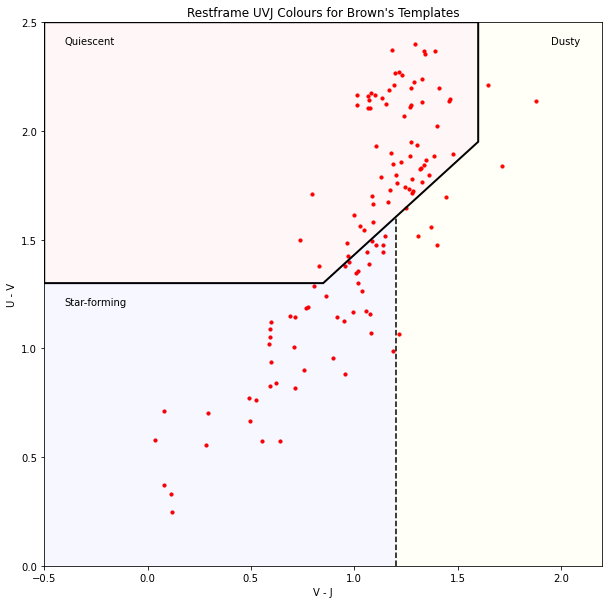

In [1287]:
# We can now plot the UVJ colours using the colours we calculated in the UV, and VJ space.

plt.figure(figsize=(10, 10))
plt.scatter(vj_list, uv_list, c="red", s=10, label="Galaxy")
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours for Brown's Templates")
plt.xlim([-0.5,2.2])
plt.axes.line_width = 4
plt.ylim([0,2.5])


    # We can use code to make patch selections on the UVJ diagram, selecting Quiescent, Star-forming, and Dusty Galaxies
    # We use the paths as provided below to make the selections.
path_quiescent = [[-0.5, 1.3],
                    [0.85, 1.3],
                    [1.6, 1.95],
                    [1.6, 2.5],
                    [-0.5, 2.5]]

path_sf = [[-0.5, 0.0],
            [-0.5, 1.3],
            [0.85, 1.3],
            [1.2, 1.60333],
            [1.2, 0.0]]

path_sfd = [[1.2, 0.0],
                [1.2, 1.60333],
                [1.6, 1.95],
                [1.6, 2.5],
                [2.2, 2.5],
                [2.2, 0.0]]

plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03),edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5) 


plt.annotate('Quiescent', (-0.4, 2.4), color='black')
plt.annotate('Star-forming', (-0.4, 1.2), color='black')
plt.annotate('Dusty', (1.95, 2.4), color='black')
plt.show()



In [1288]:
# We can perform a more indepth investigation into these colours as necessary. 

# Creating Composite SEDs with the Skirtor Models
Now that we have successfully read in the templates from Brown, we aim to use these templates, combining these templates with a selection of model templates from the Skirtor project. This will allow us to theoretically see the effect of AGN on the colour space of galaxies.

Now that we have imported, selected and manipulated the Brown templates, we can also look at the models from Skirtor. While we won't look at all of the models in the entire project, we will begin by reading all the models in and doing a similar UVJ plot on their SEDs 

In [1289]:
# read in all skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

# use the function defined in the carf module to read in the skirtor models
#skirtor_models, objname_list = read_all_skirtor_models(skirtor_folderpath)

# read in a single model for testing

SKIRTOR_PARAMS
print(SKIRTOR_PARAMS)


# AGN params
tau = SKIRTOR_PARAMS['tau'][4]
p = SKIRTOR_PARAMS['p'][2]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][5]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][0]


# read in model
agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)

{'tau': [3, 5, 7, 9, 11], 'p': [0, 0.5, 1, 1.5], 'q': [0, 0.5, 1, 1.5], 'oa': [10, 20, 30, 40, 50, 60, 70, 80], 'rr': [10, 20, 30], 'i': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]}


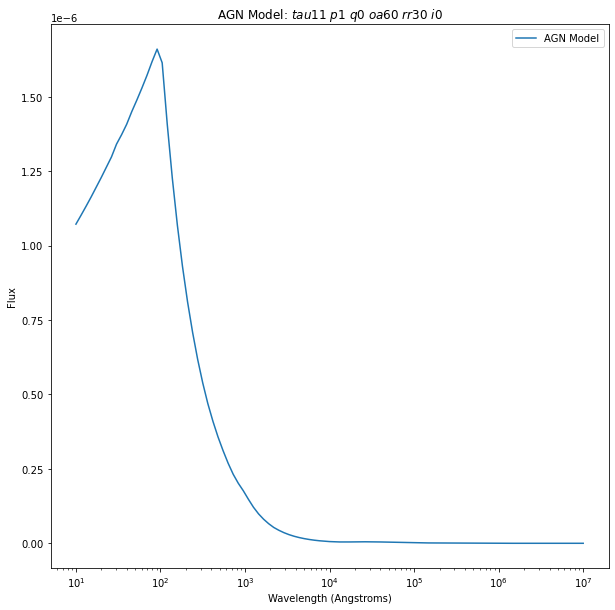

In [1290]:
# Now we have all of the models we can do a few things  
# We can now plot an SED of the model

wl = agn_model['lambda (Angstroms)']
fl = agn_model['Total Flux (erg/s/cm^2/Angstrom)']

# plot the agn model
plt.figure(figsize=(10, 10))
# plot the wavelength and flux
plt.plot(wl, fl, label='AGN Model')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('AGN Model: $tau$'+str(tau)+' $p$'+str(p)+' $q$'+str(q)+' $oa$'+str(oa)+' $rr$'+str(rr)+' $i$'+str(i))
plt.legend()
plt.xscale('log')
plt.show()






0      1.000000e+01
1      1.148154e+01
2      1.318257e+01
3      1.513561e+01
4      1.737801e+01
           ...     
127    5.754399e+06
128    6.606934e+06
129    7.585776e+06
130    8.709636e+06
131    1.000000e+07
Name: lambda (Angstroms), Length: 132, dtype: float64
0      1.072236e-06
1      1.101906e-06
2      1.132353e-06
3      1.163713e-06
4      1.196296e-06
           ...     
127    1.777759e-16
128    7.920397e-17
129    3.527742e-17
130    1.571430e-17
131    6.704363e-18
Name: Total Flux (erg/s/cm^2/Angstrom), Length: 132, dtype: float64


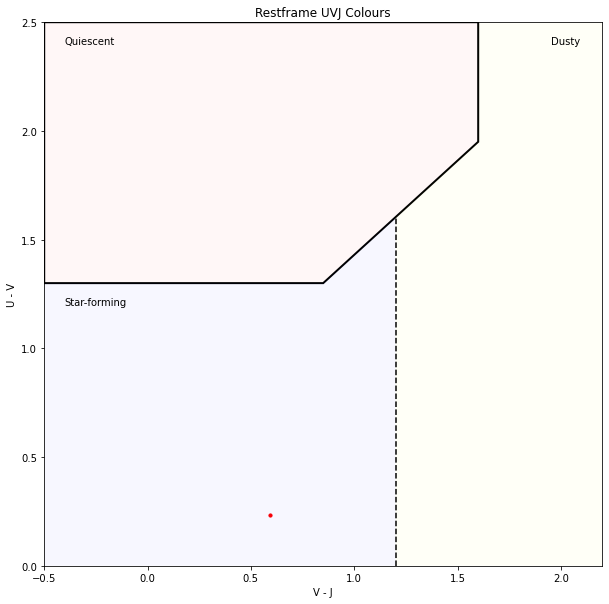

In [1291]:
# After having seen that the model can be plotted we can now calculate the UVJ colours for the AGN model
# We can use the same code as before to calculate the UVJ colours for the AGN model


new_sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs


print(wl)
print(fl)

# Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
# We will use the AB magnitude system
uv = astSED.SED.calcColour(new_sed, pb_U, pb_V, magType='AB')
vj = astSED.SED.calcColour(new_sed, pb_V, pb_J, magType='AB')


plot_uvj(uv, vj)


In [1292]:
# Quickly do a little simulation to see how change the inclination angle effects the UVJ colour space


tau = SKIRTOR_PARAMS['tau'][0]
p = SKIRTOR_PARAMS['p'][0]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][2]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][0]



# testing over all angles 
uv_list = []
vj_list = []
inclin = []

for inclination in SKIRTOR_PARAMS['i']:
    # read in model
    agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, inclination)
    
    wl = agn_model['lambda (Angstroms)']
    fl = agn_model['Total Flux (erg/s/cm^2/Angstrom)']
    
    # create an SED object containing the SED of the AGN
    sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs

    # Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
    # We will use the AB magnitude system
    uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')  
    
    # add to uv and vj list
    uv_list.append(uv)
    vj_list.append(vj)
    inclin.append(inclination)



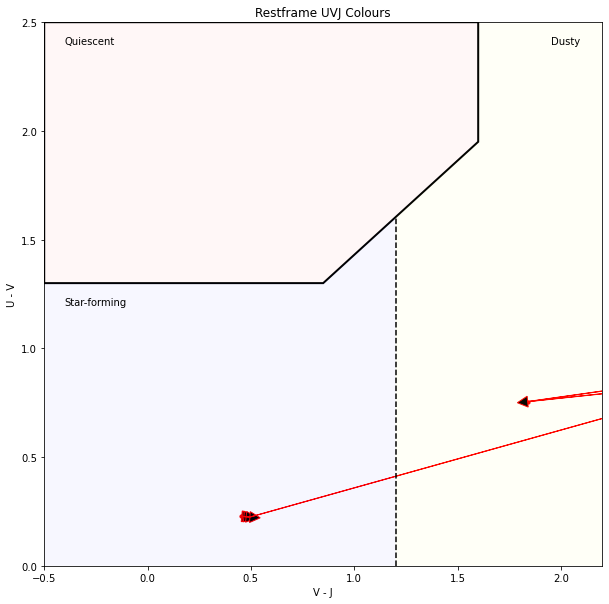

In [1293]:
plot_uvj(uv_list[0:9], vj_list[0:9], True)


In [1294]:
# Todo next



Now we have a rudimentary understanding of the models, we can combine the models with the Brown templates to create composite SEDs. These composite SEDs will be used to create a UVJ plot to see the effect of AGN on the colour space of galaxies.



To accomplish this we focus on doing the next few things:

1. Adding swire templates handling into the helper package [!]
2. Adding the ability to read in the swire templates[!]
3. functionality to create composite SEDs
4. combining swire seds with agn models
5. plotting the composite seds on a UVJ diagram
6. ability to read in the fritz models
7. combining the fritz models with the swire templates
8. adding all of the above into functionality that can be reused in a seperate file










In [1295]:
# Attempt to read swire 
swire_folderpath = os.path.join('datasets', 'Templates', 'SWIRE')
# read in all swire models
swire_models, objname_list = read_swire_templates(swire_folderpath)


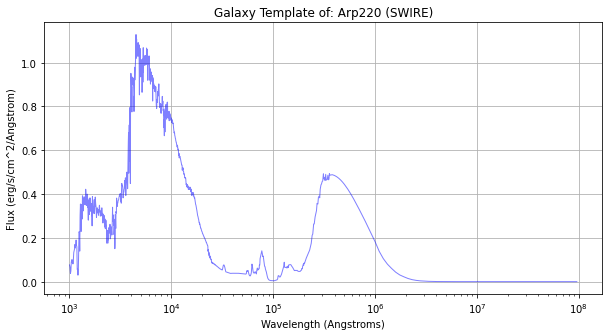

In [1296]:
# Plot a few of the swire models

# print a random galaxy
n = 0#p.random.randint(0, len(swire_models))

# read in a single model for testing
swire_model = swire_models[n]

# name
name = objname_list[n] 

# plot the sed
wl = swire_model['lambda (Angstroms)']
fl = swire_model['Total Flux (erg/s/cm^2/Angstrom)']

# plot the template
plot_galaxy_sed(wl, fl, name, "SWIRE")

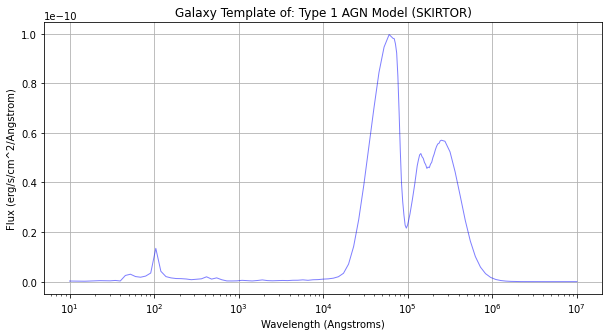

In [1297]:
# We now want to create composite SEDs from the AGN torus models from earlier, and other models. In particular
# We would first like to use the SWIRE templates to create the composite SEDs and later generalise this
# proccess so it may be used with other templates.

# As we are first using the SWIRE templates, it is easy enough to inspect. We see that the 
# normalisation has been made on these templates for the total flux. They have been normalised at 5500 Angstroms

# Begin by importing the first AGN model we would like to use
tau = SKIRTOR_PARAMS['tau'][3]
p = SKIRTOR_PARAMS['p'][0]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][2]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][0]

# read in model
agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, 90)

# Plot model
wl = agn_model['lambda (Angstroms)']
fl = agn_model['Total Flux (erg/s/cm^2/Angstrom)']

# plot the agn model
plot_galaxy_sed(wl, fl, "Type 1 AGN Model", "SKIRTOR")

In [1298]:
# define a normalization function

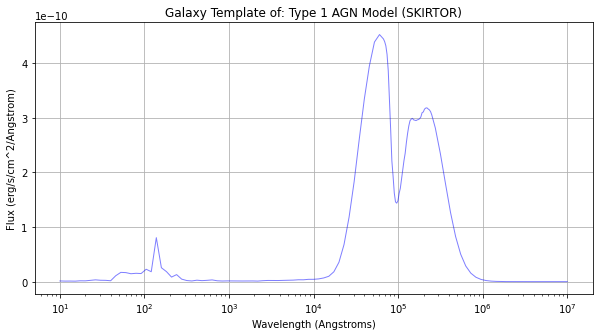

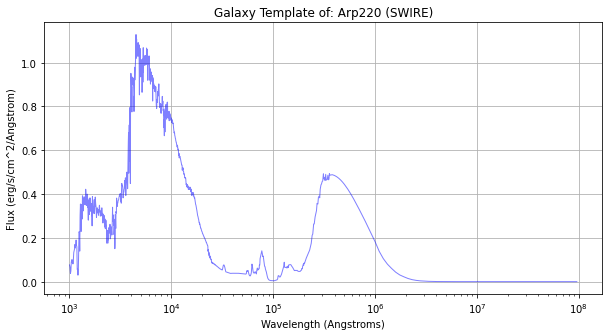

In [1299]:
# Begin by importing the first AGN model we would like to use
tau = SKIRTOR_PARAMS['tau'][2]
p = SKIRTOR_PARAMS['p'][0]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][4]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][8]

# read in model
agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)


# Plot model
wl = agn_model['lambda (Angstroms)']
fl = agn_model['Total Flux (erg/s/cm^2/Angstrom)']

# plot the agn model
plot_galaxy_sed(wl, fl, "Type 1 AGN Model", "SKIRTOR")

# plot the swire template
wl = swire_model['lambda (Angstroms)']
fl = swire_model['Total Flux (erg/s/cm^2/Angstrom)']

# plot the template
plot_galaxy_sed(wl, fl, name, "SWIRE")

In [1300]:
# def normalize_sed(wavelengths, flux, reference_wavelength):
#     """
#     Normalize the flux of a spectral energy distribution (SED) at a specified reference wavelength.
#     If the exact reference wavelength is not found, use the next closest wavelength.

#     Parameters:
#     - wavelengths (numpy array): Array of wavelengths (in microns).
#     - flux (numpy array): Array of flux values corresponding to each wavelength.
#     - reference_wavelength (float): Reference wavelength (in microns) to normalize the flux.

#     Returns:
#     - normalized_flux (numpy array): Normalized flux values of the SED.
#     """
#     # Find the index of the reference wavelength in the wavelengths array
#     ref_index = np.argmin(np.abs(wavelengths - reference_wavelength))
    
#     # Get the flux value at the reference wavelength or the next closest wavelength
#     ref_flux = flux[ref_index]
    
#     # Normalize the flux values by dividing by the reference flux
#     normalized_flux = flux / ref_flux
    
#     return normalized_flux


# def scaling_error(scale_factor, sed1_flux, sed2_flux):
#     scaled_sed2_flux = sed2_flux * scale_factor
#     error = np.sum((sed1_flux - scaled_sed2_flux) ** 2)  # Least squares error
#     return error


In [1301]:
# Make sure the SEDs cover the same wavelength range
# We would like the wavelengths to run from 912A to 10^7A



# We would like to linearly interpolate the SWIRE templates to the AGN model based on the value of a
# AGN Contribution -> 100%

# AGN Contribution -> 100%
wavelengths_sed1 = agn_model['lambda (Angstroms)']
flux_sed1 = agn_model['Total Flux (erg/s/cm^2/Angstrom)']



1005.0
10000000.0
Combined Wavelengths: [1.00500e+03 1.01500e+03 1.02500e+03 ... 7.92483e+07 8.69749e+07
 9.54548e+07]
Combined Flux Values: [7.59426172e-03 6.62871327e-03 3.68593685e-03 ... 2.47077140e-09
 2.10792097e-09 1.79835452e-09]


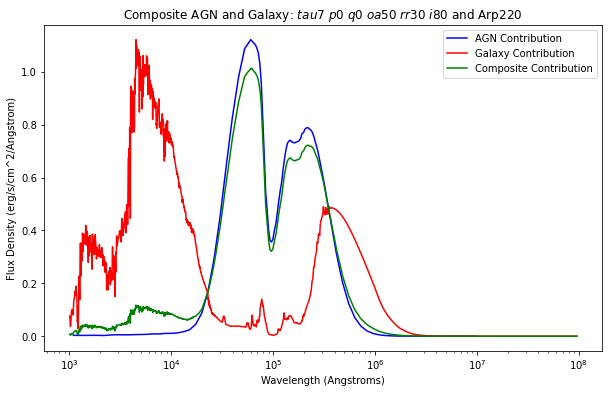

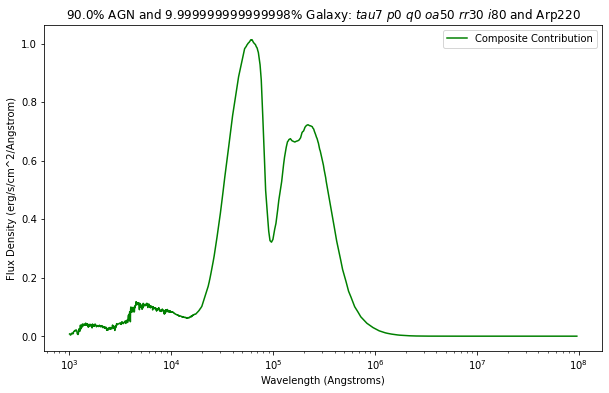

In [1302]:

# Galaxy Contribution -> 100%
wavelengths_sed2 = swire_model['lambda (Angstroms)']
flux_sed2 = swire_model['Total Flux (erg/s/cm^2/Angstrom)']

# Normalize at a particular wavelength
reference_wavelength = 5500

# Normalize the flux of the SEDs
flux_sed1 = normalize_sed(wavelengths_sed1, flux_sed1, 5500) # AGN
flux_sed2 = normalize_sed(wavelengths_sed2, flux_sed2, 5500) # Galaxy

# Cut the AGN models so that they are within the range of the SWIRE models
min_wavelength = np.max([np.min(wavelengths_sed1), np.min(wl)])
max_wavelength = np.min([np.max(wavelengths_sed1), np.max(wl)]) 
print(min_wavelength)
print(max_wavelength)

# Cut the AGN model
mask = (wavelengths_sed1 >= min_wavelength) & (wavelengths_sed1 <= max_wavelength) 
wavelengths_sed1 = wavelengths_sed1[mask]
flux_sed1 = flux_sed1[mask]

# Initial guess for the scaling factor (e.g., 1.0)
initial_guess = 1.0

# Use scipy.optimize.minimize to find the optimal scaling factor
#result = minimize(scaling_error, initial_guess, args=(flux_sed2, flux_sed1))

# Get the optimal scaling factor from the optimization result
#scaling_factor = result.x[0]

# alternatively
# Find the scaling factor to align the highest point of SED 2 to the highest point of SED 1
scaling_factor = np.max(flux_sed2) / np.max(flux_sed1)

# Scale AGN flux
flux_sed1 = flux_sed1 * scaling_factor # Should create a well scaled SED for the AGN


# Combine SEDs with interpolation
combined_wavelengths = np.union1d(wavelengths_sed1, wavelengths_sed2)

# Interpolate flux values for the combined wavelengths
combined_flux_sed1 = np.interp(combined_wavelengths, wavelengths_sed1, flux_sed1, left=np.nan, right=np.nan)
combined_flux_sed2 = np.interp(combined_wavelengths, wavelengths_sed2, flux_sed2, left=np.nan, right=np.nan)



# where there are nan, replace with 0
combined_flux_sed1 = np.nan_to_num(combined_flux_sed1)
combined_flux_sed2 = np.nan_to_num(combined_flux_sed2)

# Take the mean flux at each wavelength
#combined_flux = np.nanmean(np.vstack([combined_flux_sed1, combined_flux_sed2]), axis=0)
# Sum the flux values at each wavelength
alpha = 0.9 # AGN contribution
combined_flux = alpha*combined_flux_sed1 + (1-alpha)*combined_flux_sed2



# Print or use the combined data as needed
print("Combined Wavelengths:", combined_wavelengths)
print("Combined Flux Values:", combined_flux)




# plot the combined SEDs
plt.figure(figsize=(10, 6))
plt.plot(wavelengths_sed1, flux_sed1, 'b', label='AGN Contribution')
plt.plot(wavelengths_sed2, flux_sed2, 'r', label='Galaxy Contribution')
plt.plot(combined_wavelengths, combined_flux, 'g', label='Composite Contribution')
plt.title('Composite AGN and Galaxy: $tau$'+str(tau)+' $p$'+str(p)+' $q$'+str(q)+' $oa$'+str(oa)+' $rr$'+str(rr)+' $i$'+str(i) + ' and ' + name)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux Density (erg/s/cm^2/Angstrom)')

#plt.xlim([10**3, 10**6])
#plt.ylim(0, 10)
plt.xscale('log')
plt.legend()
plt.show()


# reduce sed values to only values of 912 Angstroms and above
idx = np.where(combined_wavelengths > 912)[0]
combined_wavelengths = combined_wavelengths[idx]
combined_flux = combined_flux[idx]


# plot new SED
plt.figure(figsize=(10, 6))
plt.plot(combined_wavelengths, combined_flux, 'g', label='Composite Contribution')
plt.title(str(alpha*100) +'% AGN and '+ str((1-alpha)*100)+ "%" +" Galaxy: $tau$"+str(tau)+' $p$'+str(p)+' $q$'+str(q)+' $oa$'+str(oa)+' $rr$'+str(rr)+' $i$'+str(i) + ' and ' + name)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux Density (erg/s/cm^2/Angstrom)')
plt.xscale('log')

plt.legend()
plt.show()

In [1303]:
# Now that we have a composite galaxy, we can calculate the UVJ colours for the galaxy
# We can use the same code as before to calculate the UVJ colours for the AGN model
# create an SED object containing the SED of the AGN

uv_list = []
vj_list = []
sed = astSED.SED(wavelength=combined_wavelengths, flux=combined_flux) # z = 0.0 as these are restframe SEDs

    # Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
    # We will use the AB magnitude system
uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')  
    
    # add to uv and vj list
uv_list.append(uv)
vj_list.append(vj)



# Also convert the AGN to colours, and the galaxy to colours
# create an SED object containing the SED of the AGN
sed = astSED.SED(wavelength=wavelengths_sed1, flux=flux_sed1) # z = 0.0 as these are restframe SEDs

    # Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
    # We will use the AB magnitude system
uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')  
    
    # add to uv and vj list
uv_list.append(uv)
vj_list.append(vj)

# finall of the swire template
sed = astSED.SED(wavelength=wavelengths_sed2, flux=flux_sed2) # z = 0.0 as these are restframe SEDs

    # Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
    # We will use the AB magnitude system
uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')  
    
    # add to uv and vj list
uv_list.append(uv)
vj_list.append(vj)



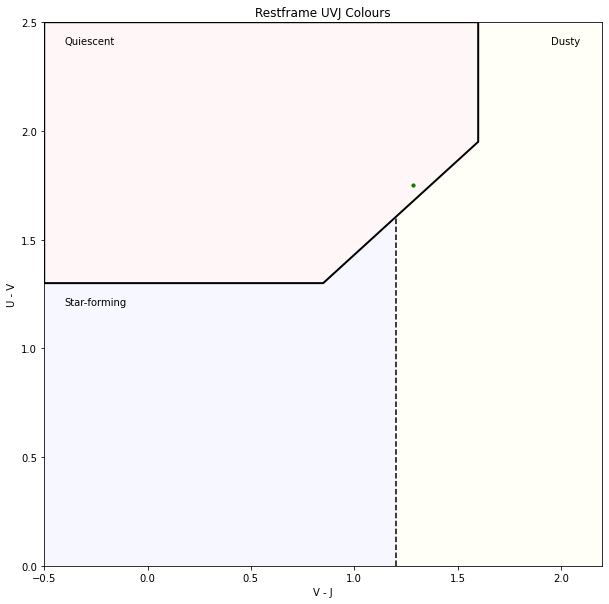

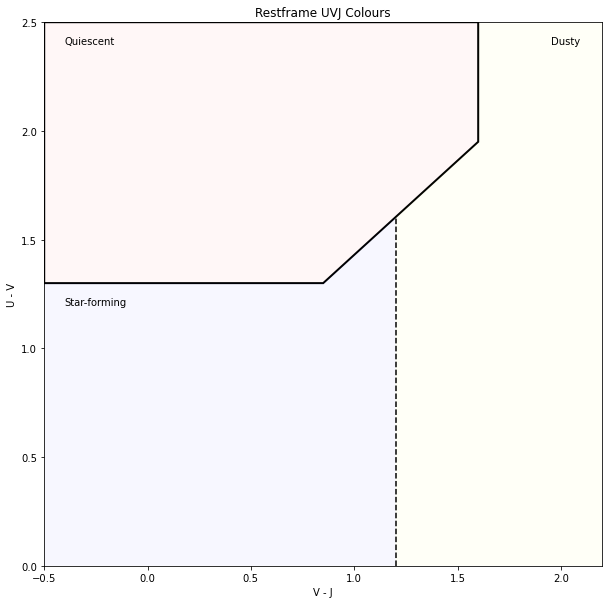

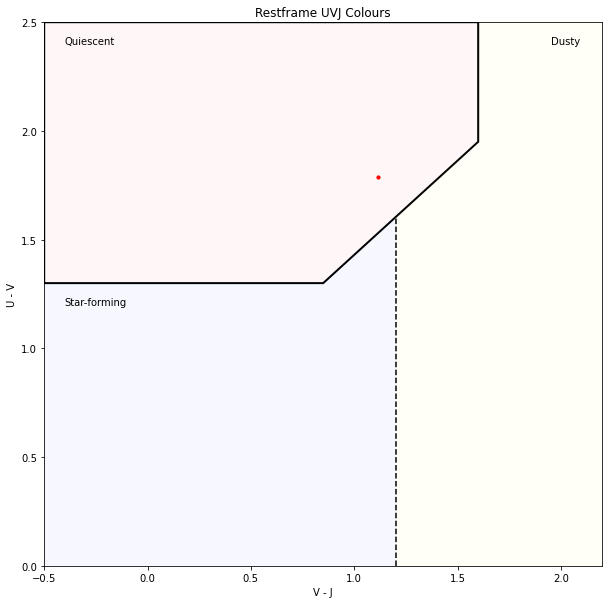

In [1304]:
# Plot the UVJ Colours

# Plot the UVJ of :
# 1. The composite galaxy
# 2. The AGN
# 3. The Galaxy



plot_uvj(uv_list[0], vj_list[0], False, 'green') # Composite
plot_uvj(uv_list[1], vj_list[1], False, 'blue') # AGN
plot_uvj(uv_list[2], vj_list[2], False, 'red') # Galaxy


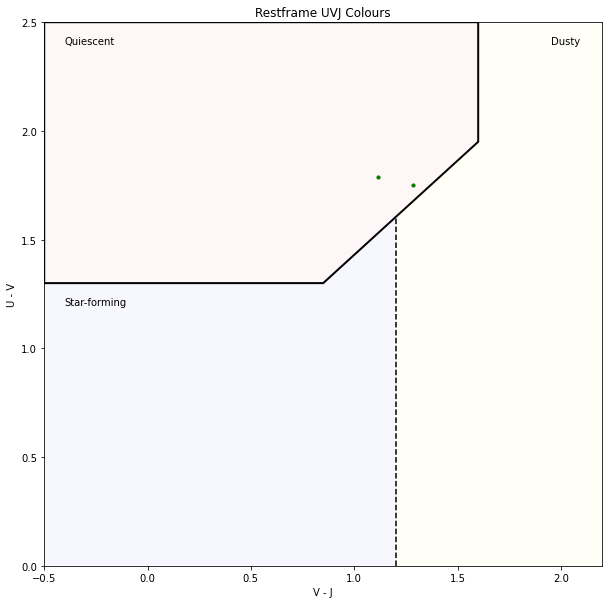

In [1305]:
plot_uvj(uv_list, vj_list, False, 'green')

sed_composite = (1 - a) * sed_swire + a * sed_agn